# **Climate Change Belief Analysis**

## Introduction

Climate change always been acknowledged by the scientific community as one of the critical issues facing mankind. Many companies are built around the idea of preserving an environmental friendly culture, be it on the products and services they offer or the actual raw material used to extend the structure of their company. One thing that has not been of certain yet is what perception other people have on environmental awareness. 

It is of importance to understand public perception of climate change through the use of twitter data. This will allow companies access to a broad base of consumer sentiment thereby increasing their insights for future marketing strategies.

<div align="center" style="width: 400px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.iberdrola.com/wcorp/gc/prod/en_US/comunicacion/cambio_climatico_economia_mult_1_res/Cambio_Climatico_Economia_746x419.jpg"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

## Problem Statement

There is an excess of information about climate change on social media platforms like Twitter. As such it is difficult for companies to discern the beliefs of people relating to climate change.  Having a robust machine learning model that is able to classify a person's belief in climate change from historical tweet data, as part of companies toolset will enable them to better gauge their perception of customers relating to their products and services.

## Table of Content

    1. Importing of Libraries
    2  Loading of Dataset
       2.1 General Overview of Dataset
       2.1.1 Data Summary
    3. Data Preprocessing
    4. Exploratory Data Analysis
    5. Feature Enginering
    6. Model Building




In [1]:
cd C:/Users/Admin/Anaconda3/Lib/site-packages/en_core_web_lg

C:\Users\Admin\Anaconda3\Lib\site-packages\en_core_web_lg


In [ ]:
!pip install emot --upgrade

In [ ]:
import comet_ml
from comet_ml import Experiment


In [ ]:
#Setting up API Key
#experiment = Experiment(api_key = 'tqGA4GwDac0pGpB0LG33gEjuC', project_name = 'team7-july2020 - Copy', workspace = "kolawole")


# 1. Importing of Libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import string
import re
import contractions
import pickle
import seaborn as sns
import warnings
import emoji

from textblob import TextBlob
from langdetect import detect
from wordcloud import WordCloud
from PIL import Image
import matplotlib.style as style

from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from advertools.emoji import extract_emoji

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')

warnings.filterwarnings("ignore")


In [3]:
nlp = spacy.load('en_core_web_lg')


In [4]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# 2. Loading of Dataset

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

In [5]:
# importing the dataset 
train = pd.read_csv('C:/Users/Admin/Downloads/Explore Data Science Academy/Class Begins/Machine Learning/Classification/Predict/train.csv')
#train = pd.read_csv('../input/climate-change-edsa2020-21/train.csv')
test = pd.read_csv('C:/Users/Admin/Downloads/Explore Data Science Academy/Class Begins/Machine Learning/Classification/Predict/test.csv')
#test = pd.read_csv('../input/climate-change-edsa2020-21/test.csv')
sample_submission = pd.read_csv('C:/Users/Admin/Downloads/Explore Data Science Academy/Class Begins/Machine Learning/Classification/Predict/sample_submission.csv')


In [6]:
train_eda = train.copy()
test_eda = test.copy()


In [57]:
train.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
test.head()


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## 2.1 General Overview of Dataset

#### Datasets:

* Train dataset: this contains 15,819 tweets and would be used for training our model

* Test dataset: this contains 10,546 tweets and would be used to use our model for prediction.

#### Variables:
* **sentiment**: the sentiment classification of the tweet (int)
* **message**: the tweet text (object)
* **tweetid**: the unique ID of each tweet

The attribute sentiment is dependent variable while the other variables are independent variables. 

The test dataset contains two (2) attributes namely: **message and tweetid**. We would be predicting the sentiment for each tweet.

The tweets sentiments are divided into four (4) classes:

* **[ 2 ] - News:** tweets links to factual news about climate change
* **[ 1 ] - Pro:** tweets that supports the belief of man-made climate change
* **[ 0 ] - Neutral:** tweets that neither support nor refutes the belief of man-made climate change
* **[-1 ] - Anti (Negative):** tweets that does not believe in man-made climate change


In [8]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### 2.1.1 Data Summary

Both test and train data sets are complete, there are no missing value.

In [9]:
# Taking general overview at both datasets
print('TRAINING DATA')
print('============='+('\n'))
print('Shape of the dataset: {}\n'.format(train.shape))
print('Total Number of unique tweets: {}\n'.format(len(set(train['message']))))
print('Total Number of missing values:\n{}\n\n'.format(train.isnull().sum()))
print('TEST DATA')
print('========='+('\n'))
print('Shape of the dataset: {}\n'.format(test.shape))
print('Total Number of unique tweets: {}\n'.format(len(set(test['message']))))
print('Total Number of missing values:\n{}\n' .format(test.isnull().sum()))


TRAINING DATA

Shape of the dataset: (15819, 3)

Total Number of unique tweets: 14229

Total Number of missing values:
sentiment    0
message      0
tweetid      0
dtype: int64


TEST DATA

Shape of the dataset: (10546, 2)

Total Number of unique tweets: 9575

Total Number of missing values:
message    0
tweetid    0
dtype: int64



# **3. Data Preprocessing**

Text is the most unstructured form of all the available data. Tweets fall into this category as they are texts. Within texts are various types of noise and these are not readily analyzable without any pre-processing applied on them. In order to gain insights from these data, it is pertinent that we examine and apply proper data cleaning and standardization and making it ready for analysis. This process is called preprocessing.

<br></br>

<div align="center" style="width: 400px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRFqLn7H63SxVezmGfi1a5Ok82DMTkli_eA5g&usqp=CAU"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

Before exploration and modelling of our dataset we would be carrying out some preprocessing in order to clean and standardize our dataset for proper insight and analysis.

This entails:

* Noise Removal/Tweet cleaning
* Tokenization
* Lexicon Normalization
* Object Standardization



## **3.1 Noise Removal/Text Cleaning**

We can categorize noise as any piece of text which is not relevant to the context of the data at hand and the expected output.

Removal of tweets with URL's, punctuations, extra white spaces, numbers, mentions, emojis etc is essential before model building. Conversion of tweets to lowercase would also be carried out. English language stopwords (commonly used words of a language – is, am, the, of, in etc) would be removed from the tweets.


### 3.1.1 Tweets Cleaning

In [89]:
def tweets_cleaner(tweets):
    
    """
    This function uses regular expressions to remove url's, mentions, hashtags, 
    punctuation, numbers and any extra white space from tweets after converting 
    the tweets to lowercase.

    Input:
    tweets: original tweet
            datatype: string

    Output:
    tweets: modified tweet
            datatype: string
    """
    # Conversion of all tweets to lowercase
    tweets = tweets.lower() 
    
    # Replace of all url's in the tweet
    tweets = re.sub(r'https?:\/\/.*\/\w*', 'website', tweets)

    # Removal of mentions in the tweet
    tweets = re.sub('@[\w]*','twitterhandle ',tweets)
    
    # Removal of numbers in the tweet
    tweets = re.sub(r'\d+', '', tweets)  

    # Removal of hashtags in the tweet
    tweets = re.sub(r'#\w*', '', tweets)    
    
    
    # Removal of the funny diamonds in the tweet
    tweets = re.sub(r"U+FFFD ", ' ', tweets)
    
    # Removal of extra whitespace in the tweet
    tweets = re.sub(r'\s\s+', ' ', tweets)
    
    # Removal of space in front/beginning of tweet
    tweets = tweets.strip(' ')
    
    return tweets


In [8]:
# Application of the function to clean the tweets
train['message'] = train['message'].apply(tweets_cleaner)
test['message'] = test['message'].apply(tweets_cleaner)


In [60]:
train.head()


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt : researchers say we have three years to ac...,698562
3,1,wired : was a pivotal year in the war on clima...,573736
4,1,"rt : it's , and a racist, sexist, climate chan...",466954


In [16]:
test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985
3,putin got to you too jill ! trump doesn't beli...,476263
4,rt : 'female orgasms cause global warming!'\n-...,872928


### 3.1.2 Extraction of Emojis

In [95]:
def extract_all_emojis(tweet):
    """This function extracts all emoji's
        existing in a tweet text
    Input:
    tweets: original tweet
           datatype: string

    Output:
    tweets: modified tweet
           datatype: string
    """

    emojis = ''.join(i for i in tweet if i in emoji.UNICODE_EMOJI)
    if emojis:
        return emojis
    return None


In [94]:
# Extracting the emojis
train['emojis'] = train['message'].apply(extract_all_emojis)
train.emojis.fillna(value=np.nan, inplace=True)


AttributeError: 'str' object has no attribute 'dtype'

In [62]:
train[train['emojis'].notnull()].head()

,sentiment,message,tweetid,emojis
56,-1,lmao 😂 snowflakes ❄️ complaining about snowfla...,911385,😂❄❄🤦♂
121,-1,kinda funny the professors talk shit trumpster...,740194,🤔
209,0,they asked me what my inspiration was- i told ...,797850,😂🔥🌎❄
230,1,rt : people still don't believe in global warm...,960037,♂
488,1,rt : you're honestly dumb as hell if you think...,794085,🙄🙄


In [11]:
#Function that converts the emojis to text
def text_emoji(tweet):
    """
    This function accepts tweets column
    and converts emoji's to their text meaning
    Input:
    tweets: original tweet
           datatype: string

    Output:
    tweets: modified tweet
           datatype: string
    
    """
    emoji_converter = emoji.demojize(txt, delimiters=("", ""))
    return emoji_converter

In [12]:
# Extracting the emojis on the train dataset
train['message'] = train['message'].apply(text_emoji)
# Extracting the emojis on the test dataset
test['message'] = test['message'].apply(text_emoji)


In [22]:
train[train['emojis'].notnull()].head()

,sentiment,message,tweetid,emojis
56,-1,lmao face_with_tears_of_joy snowflakes snowfla...,911385,😂❄❄🤦♂
121,-1,kinda funny the professors talk shit trumpster...,740194,🤔
209,0,they asked me what my inspiration was- i told ...,797850,😂🔥🌎❄
230,1,rt : people still don't believe in global warm...,960037,♂
488,1,rt : you're honestly dumb as hell if you think...,794085,🙄🙄


### 3.1.3 Defining Abbreviations

In [13]:
# Defining a variable to hold common text and social media abbreviations as dictionary
abbreviations = {"aka": "also known as",
                 "btw": "by the way",
                 "b/c": "because", 
                 "fyi": "for your information",
                 "idk": "i do not know", 
                 "lol": "laughing out loud",
                 "lmao": "laughing my ass off", 
                 "lmfao": "laughing",
                 "omg": "oh my god", 
                 "otoh": "on the other hand",
                 "wth": "what the hell", 
                 "wtf": "what the fuck",
                 "icymi": "in case you missed it",
                 "rofl": "rolling on the floor laughing",
                 "stfu": "shut the fuck up", 
                 "nvm": "nevermind",
                 "luv": "love", 
                 "luvs": "loves"
                }

### 3.1.4 Contraction Function

In [14]:
def contraction_converter(tweet):
    """
    This function cleans the tweet data
    by expanding each contraction.
    
    Arguments:
            tweet: dataframe column containing tweets
            
    Returns:
            A dataframe of cleaned tweets
    """

    return contractions.fix(tweet)

In [15]:
train['message'] =train['message'].apply(contraction_converter)
test['message'] =test['message'].apply(contraction_converter)

In [27]:
train.head()

,sentiment,message,tweetid,emojis
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN
1,1,it is not like we lack evidence of anthropogen...,126103,NaN
2,2,rt : researchers say we have three years to ac...,698562,NaN
3,1,wired : was a pivotal year in the war on clima...,573736,NaN
4,1,"rt : it is , and a racist, sexist, climate cha...",466954,NaN


### 3.1.5 Abbrevation Removal

In [16]:
def abbreviation_converter(tweet, abbrev_dict):
    """
    This function cleans the tweet data by
    expanding each common text abbrieviations.
    
    Arguments:
            tweet: dataframe column containing tweets
            abbreviation_dict: dictionary of text abbreviations to be expanded

    Returns:
            A dataframe of cleaned tweets
    """

    # replace tweet abbreviations with the abbreviation dictionary
    tweet = tweet.replace(abbrev_dict, regex=True)
    
    return tweet

In [17]:
# Application of the function to clean the tweets
train['message'] = abbreviation_converter(train['message'], abbreviations)
test['message'] = abbreviation_converter(test['message'], abbreviations)

### 3.1.6 Punctuation Removal

In [18]:
def remove_punctuation(tweets):
    
    """
    This function uses regular expressions to remove 
    punctuation from tweets.

    Input:
    tweets: original tweet
           datatype: 'str'

    Output:
    tweets: modified tweet
           datatype: 'str'
    """
    # Removal of punctuation in the tweet
    tweets = ''.join([char for char in tweets if char not in string.punctuation])
    return tweets


In [19]:
# Application of the function to clean the tweets
train['message'] = train['message'].apply(remove_punctuation)
test['message'] = test['message'].apply(remove_punctuation)


In [32]:
train.head()

,sentiment,message,tweetid,emojis
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN
1,1,it is not like we lack evidence of anthropogen...,126103,NaN
2,2,rt researchers say we have three years to act...,698562,NaN
3,1,wired was a pivotal year in the war on climat...,573736,NaN
4,1,rt it is and a racist sexist climate change ...,466954,NaN


### 3.1.7 Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will be using this tokeniser to clean up the dataset in order to prepare it for analysis.


In [20]:
def tokenize_tweet(tweets):
    """
    This function takes in tweets from the dataframe 
    and divides the each tweet into a sequence of tokens
    
    Input:
    tweets: original tweet
            datatype: 'str'

    Output:
    tokenized_tweet: modified tweet
                     datatype: 'str'
    """
    tokeniser = TreebankWordTokenizer()
    tokenized = tokeniser.tokenize(tweets)
    return tokenized

In [21]:
# Application of the function to tokenize each tweet
train['token'] = train['message'].apply(tokenize_tweet)
test['token'] = test['message'].apply(tokenize_tweet)

In [35]:
train.head()

,sentiment,message,tweetid,emojis,token
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,"[polyscimajor, epa, chief, does, not, think, c..."
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,"[it, is, not, like, we, lack, evidence, of, an..."
2,2,rt researchers say we have three years to act...,698562,NaN,"[rt, researchers, say, we, have, three, years,..."
3,1,wired was a pivotal year in the war on climat...,573736,NaN,"[wired, was, a, pivotal, year, in, the, war, o..."
4,1,rt it is and a racist sexist climate change ...,466954,NaN,"[rt, it, is, and, a, racist, sexist, climate, ..."


### 3.1.8 Lexicon Normalization

Lexical normalization is the process of transforming non-standard word tokens into their standard forms.

The words “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
Though they mean different but contextually all are similar. The step converts all the disparities of a word into their normalized form (also known as lemma).

Normalization is an important step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature).

The most common lexicon normalization practices are:

**Stemming**:  This is a process of transforming a word to its root word. This uses an algorithm that remove common word-endings from English words (e.g. “ing”, “ed”, “ly”, “es”, “s” etc). A lot of times, the stemmed (root) words might be words that you may not be able to look up in a dictionary. 

**Lemmatization**: This is a process of grouping similar words with similar meaning together. This is a procedure of obtaining the root form of a word, it makes use of vocabulary i.e. the dictionary importance of words, and morphological analysis (word structure and grammar relations). Unlike the stemming process, you can look up a lemma from a dictionary except in few occasions.


### 3.1.9 Stemming

In [22]:
def word_stemmer(tweets):
    """
    This function takes in tweets from the dataframe 
    and get the stem (root word) for each tweet
    
    Input:
    tweets: original tweet
            datatype: 'str'

    Output:
    tokenized_tweet: modified tweet
                     datatype: list
    """
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(word) for word in tweets]

In [23]:
# Applying stemming function to the tokenized tweets
train['stem'] = train['token'].apply(word_stemmer)

In [38]:
train.head()

,sentiment,message,tweetid,emojis,token,stem
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, doe, not, think, ca..."
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[it, is, not, like, we, lack, evid, of, anthro..."
2,2,rt researchers say we have three years to act...,698562,NaN,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,..."
3,1,wired was a pivotal year in the war on climat...,573736,NaN,"[wired, was, a, pivotal, year, in, the, war, o...","[wire, was, a, pivot, year, in, the, war, on, ..."
4,1,rt it is and a racist sexist climate change ...,466954,NaN,"[rt, it, is, and, a, racist, sexist, climate, ...","[rt, it, is, and, a, racist, sexist, climat, c..."


### 3.1.10 Lemmatization

In [24]:
def word_lemmatizer(tweets):
    """
    This function takes in tweets from the dataframe 
    and get the lemma (root word) for each tweet
    
    Input:
    tweets: original tweet
            datatype: 'str'

    Output:
    tokenized_tweet: modified tweet
                     datatype: list
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tweets]


In [25]:
# Applying the Lemmatization function to each tokenized tweet
train['lemma'] = train['token'].apply(lambda x: word_lemmatizer(x))
test['message'] = test['token'].apply(lambda x: word_lemmatizer(x))

In [72]:
test.head()

,message,tweetid,token
0,"[europe, will, now, be, looking, to, china, to...",169760,"[europe, will, now, be, looking, to, china, to..."
1,"[combine, this, with, the, polling, of, staffe...",35326,"[combine, this, with, the, polling, of, staffe..."
2,"[the, scary, unimpeachable, evidence, that, cl...",224985,"[the, scary, unimpeachable, evidence, that, cl..."
3,"[putin, got, to, you, too, jill, trump, doe, n...",476263,"[putin, got, to, you, too, jill, trump, does, ..."
4,"[rt, female, orgasm, because, global, warming,...",872928,"[rt, female, orgasms, because, global, warming..."


### 3.1.11 Stop Words

There is a pre-defined stop words list in English. However, we would modify these stop words by appending the retweet words to the stop words list for proper cleaning.


In [26]:
# create a list of stop words
new_stopwords = stopwords.words('english')
# update stop words list
new_stopwords.remove('not')
new_stopwords.extend(['amp']) 

In [27]:
def stop_word_removal(tweets):
    """
    This function check for stop words that exists in 
    a tweet and remove those stop words.

    Input:
    tweets: original tweet
            datatype: String

    Output:
    noiseless_tweet: modified tweet
                     datatype: string
    """
    
    # Add tweets words to the stop word dictionary
    stop_word_add = ['rt','rts','retweet']
    stop_words = set().union(new_stopwords, stop_word_add)
#    stop_words = set().union(stopwords.words('english'), stop_word_add)
    noiseless_words = [word for word in tweets if word not in stop_words] # each word is checked against the stop word dictionary and
                                                                         # return a list of the words not found in the stopwords list 
    noiseless_tweet = " ".join(noiseless_words) # we join the words together
    return noiseless_tweet # we return the cleaned tweet 


In [28]:
train['cleaned_message'] = train['lemma'].apply(stop_word_removal)
test['message'] = test['message'].apply(stop_word_removal)

In [46]:
train.head()

,sentiment,message,tweetid,emojis,token,stem,lemma,cleaned_message
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, doe, not, think, ca...","[polyscimajor, epa, chief, doe, not, think, ca...",polyscimajor epa chief doe not think carbon di...
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[it, is, not, like, we, lack, evid, of, anthro...","[it, is, not, like, we, lack, evidence, of, an...",not like lack evidence anthropogenic global wa...
2,2,rt researchers say we have three years to act...,698562,NaN,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,...","[rt, researcher, say, we, have, three, year, t...",researcher say three year act climate change l...
3,1,wired was a pivotal year in the war on climat...,573736,NaN,"[wired, was, a, pivotal, year, in, the, war, o...","[wire, was, a, pivot, year, in, the, war, on, ...","[wired, wa, a, pivotal, year, in, the, war, on...",wired wa pivotal year war climate change
4,1,rt it is and a racist sexist climate change ...,466954,NaN,"[rt, it, is, and, a, racist, sexist, climate, ...","[rt, it, is, and, a, racist, sexist, climat, c...","[rt, it, is, and, a, racist, sexist, climate, ...",racist sexist climate change denying bigot lea...


In [32]:
test.head()

,message,tweetid,token
0,europe looking china make sure not alone fight...,169760,"[europe, will, now, be, looking, to, china, to..."
1,combine polling staffer climate change woman r...,35326,"[combine, this, with, the, polling, of, staffe..."
2,scary unimpeachable evidence climate change al...,224985,"[the, scary, unimpeachable, evidence, that, cl..."
3,twitterhandle twitterhandle twitterhandle twit...,476263,"[twitterhandle, twitterhandle, twitterhandle, ..."
4,twitterhandle female orgasm global warming sar...,872928,"[rt, twitterhandle, female, orgasms, because, ..."


# 4. Exploratory Data Analysis

## 4.1 Distribution of Target Variable

These visuals help us see how our target variable (Sentiment) is distributed.

**Observation**

We observed an imbalance in the distribution of the target variable. The pro-climate change tweets far out-weigh the other sentiment group as it makes up 54% of the whole dataset. This is followed by the News tweets while the Anti-climate change individuals are the least (8%).


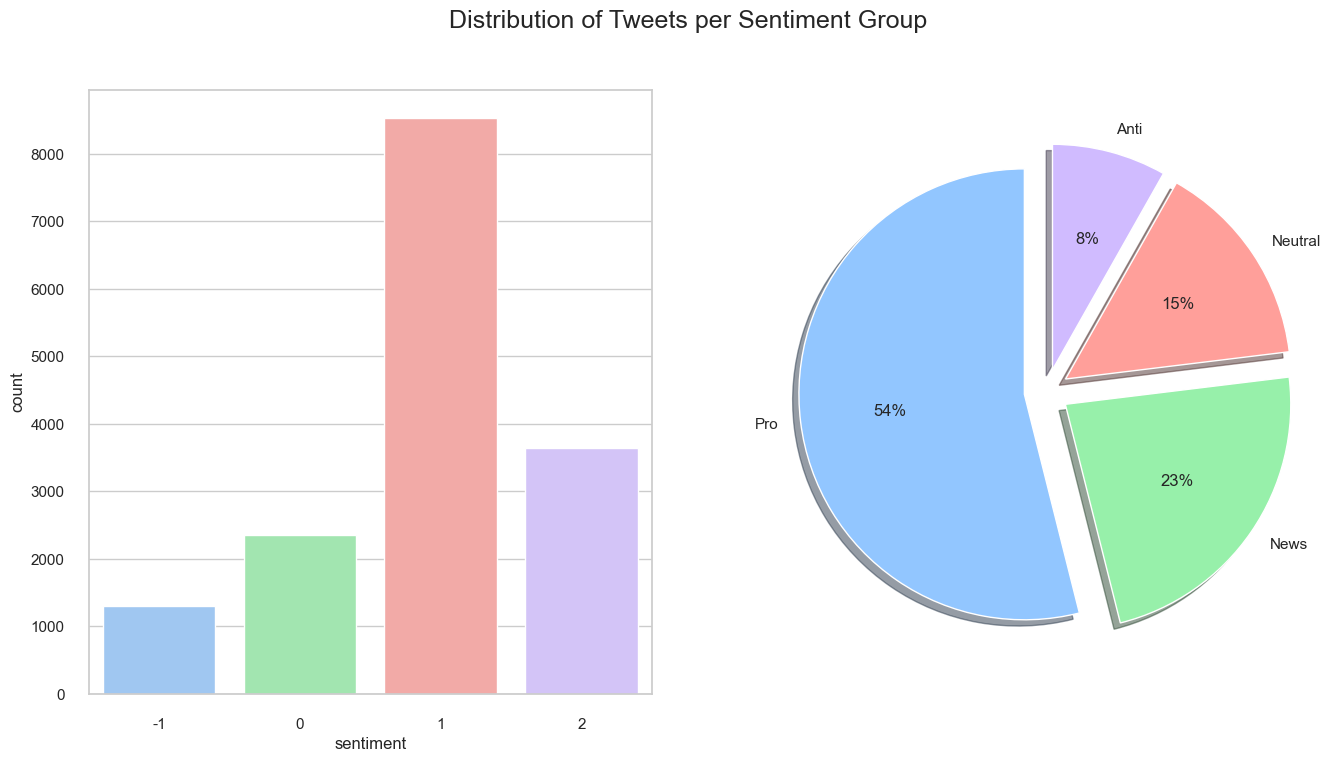

In [117]:
style.use('seaborn-pastel')
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(16, 8), 
                         dpi=100)
sns.countplot(train_eda['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 
axes[1].pie(train_eda['sentiment'].value_counts(),
            autopct='%1.0f%%',
            labels=labels,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1),
            shadow=True
           )
fig.suptitle('Distribution of Tweets per Sentiment Group', fontsize=18)
plt.show()

## 4.2 Duplicate Tweets 

Deplicate tweets are caused by the use of the retweet icon found under a tweet. These tweets being duplicated is not good for our data analysis and therefore we have to remove them. We will remove the duplicate tweets and view how much impact they have on our analysis

In [105]:
# Select all duplicate rows based on the message column
duplicate = train_eda[train_eda.duplicated(['message',
                                            'sentiment'],
                                           keep=False
                                          )
                     ]

# View top 10 duplicate rows
duplicate.head()


,sentiment,message,tweetid,hashtag
10,1,RT @StephenSchlegel: she's thinking about how ...,295793,[]
17,1,RT @patagonia: If our elected leaders fail to ...,490604,[]
18,1,RT @SenSanders: We have a president-elect who ...,228658,[]
21,1,RT @World_Wildlife: How climate change impacts...,690605,"[#cop22, #earthtomarrakech]"
35,1,RT @BernieSanders: #ImVotingBecause the future...,817108,[#imvotingbecause]


Text(0.5, 1.0, 'Class Distributions for Duplicate tweets')

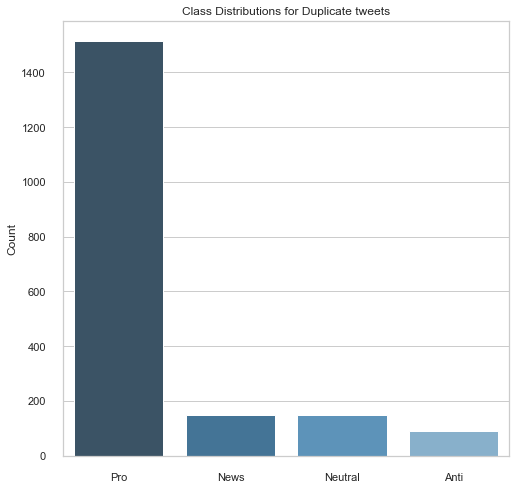

In [109]:
# Create class distribution dataframe for the duplicate tweets
class_dist = pd.DataFrame(list(duplicate['sentiment'].value_counts()), 
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count']
                         )

# Plot the class distribution
class_dis_figure = plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="Blues_d",)
plt.title('Class Distributions for Duplicate tweets')

## 4.3 Most Occuring Words by Sentiment


In [97]:
# Most common words sentiment-wise
Pro = train_eda[train_eda['sentiment']==1]
News = train_eda[train_eda['sentiment']==2]
Neutral = train_eda[train_eda['sentiment']==0]
Anti =train_eda[train_eda['sentiment']==-1]

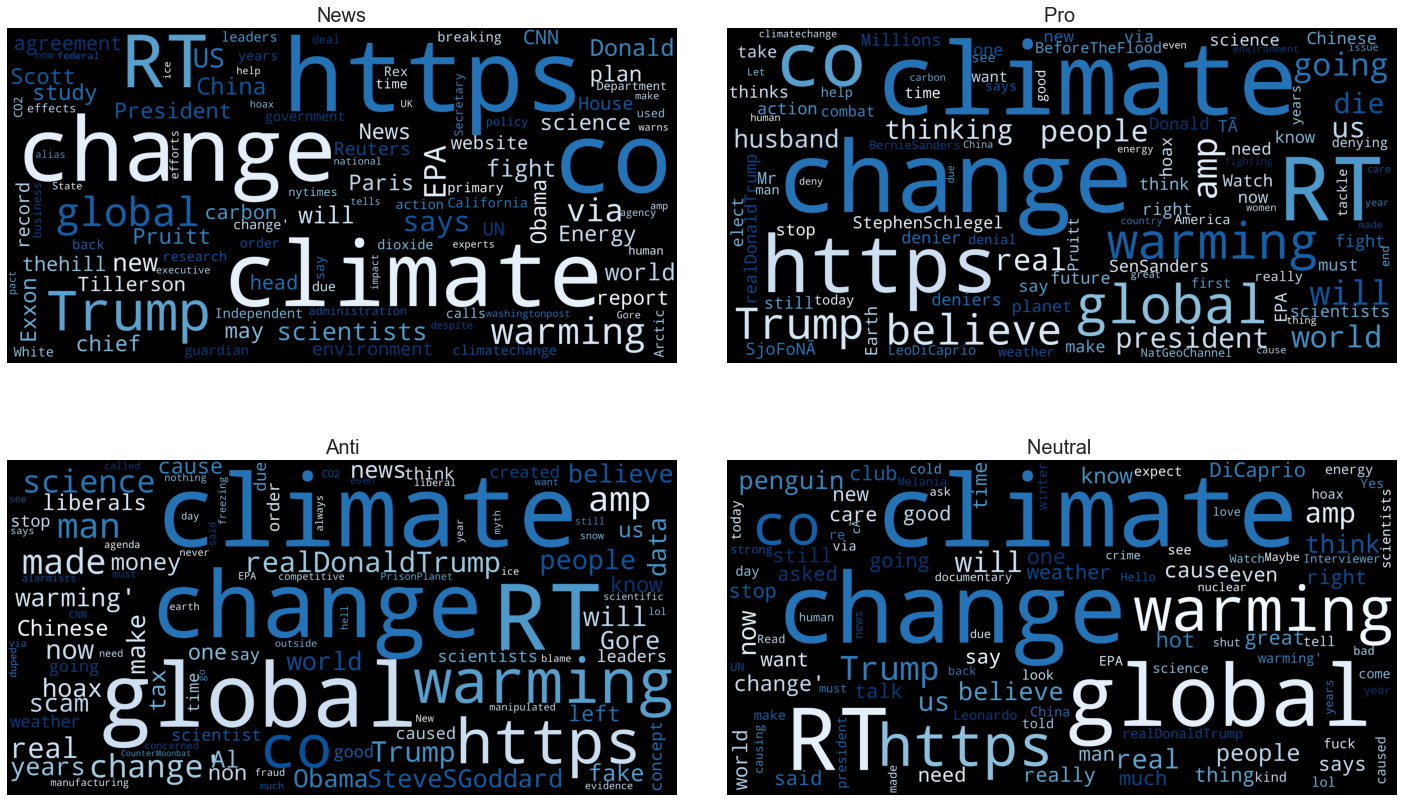

In [98]:
# Extracing rows per sentiment
news = train_eda[train_eda['sentiment'] == 2]['message']
pos = train_eda[train_eda['sentiment'] == 1]['message']
neutral = train_eda[train_eda['sentiment'] == 0]['message']
neg = train_eda[train_eda['sentiment'] ==-1]['message']

# Splitting strings into lists
news = [word for line in news for word in line.split()]
pos = [word for line in pos for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
neg = [word for line in neg for word in line.split()]

news = WordCloud(colormap='Blues',
                 background_color='black',
                 max_words=100,
                 max_font_size=60, 
                 scale=20,
                 random_state=42,
                 collocations=False,
                 normalize_plurals=False
                ).generate(' '.join(news))

pos = WordCloud(colormap='Blues',
                background_color='black',
                max_words=100,
                max_font_size=60, 
                scale=20,
                random_state=42,
                collocations=False,
                normalize_plurals=False
               ).generate(' '.join(pos))

neutral = WordCloud(colormap='Blues',
                    background_color='black',
                    max_words=100,
                    max_font_size=60,
                    scale=20,
                    random_state=42,
                    collocations=False,
                    normalize_plurals=False
                   ).generate(' '.join(neutral))

neg = WordCloud(colormap='Blues',
                background_color='black',
                max_words=100,
                max_font_size=60,
                scale=20,
                random_state=42,
                collocations=False,
                normalize_plurals=False
               ).generate(' '.join(neg))

##Creating individual wordclouds per sentiment
fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('News', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pos)
axs[0, 1].set_title('Pro ', fontsize = 20)
axs[0, 1].axis('off')

axs[1, 0].imshow(neg)
axs[1, 0].set_title('Anti', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Neutral ', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

## 4.4 Exploring tweeter handles 

This helps us understand which tweeter handles have a lot of impact on sentiments class.

In [112]:
#Creating a function to extract handles from tweets
def extract_handles(tweet):
    """
    This function finds handles in a 
    tweet and returns them as a list
    """
    handles = []
    for i in tweet:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

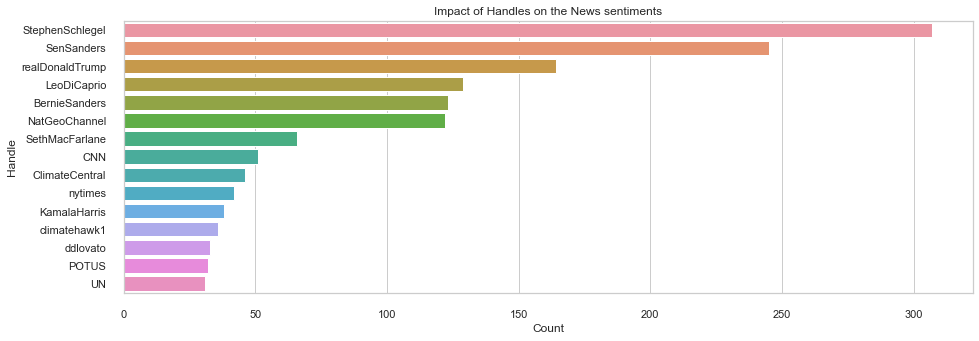

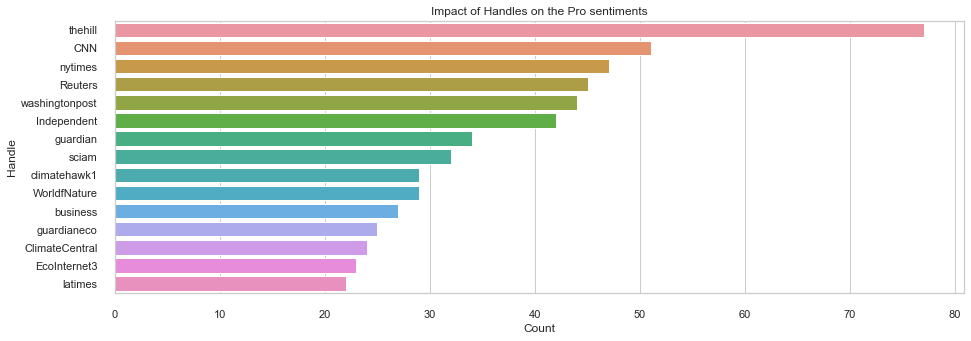

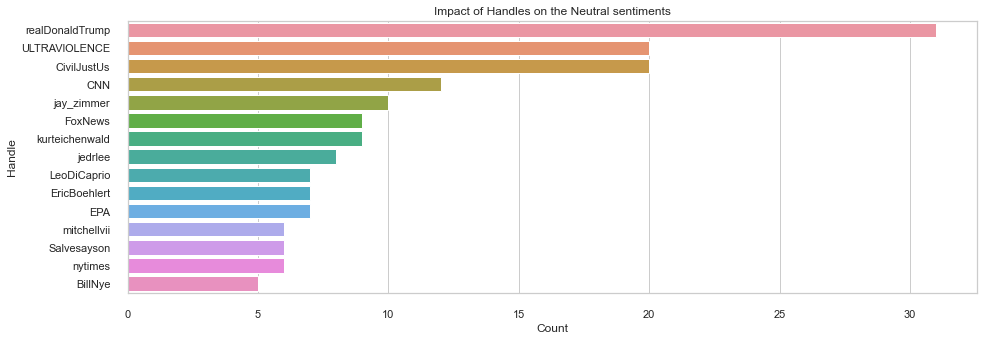

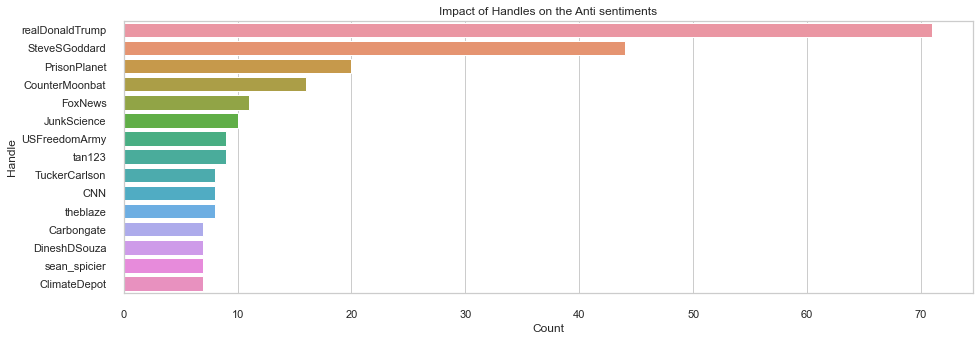

In [113]:
# Extracting handles from tweets
news_handle = extract_handles(train_eda['message']
                              [train_eda['sentiment'] == 1])
pro_handle = extract_handles(train_eda['message']
                             [train_eda['sentiment'] == 2])
neutral_handle = extract_handles(train_eda['message']
                                 [train_eda['sentiment'] == 0])
anti_handle = extract_handles(train_eda['message']
                              [train_eda['sentiment'] == -1])

# Unnesting list
handles = [sum(news_handle, []), sum(pro_handle, []), sum(neutral_handle, []),
           sum(anti_handle, [])]
# Visualising the Handles
full_title = ['Impact of Handles on the News sentiments',
              'Impact of Handles on the Pro sentiments',
              'Impact of Handles on the Neutral sentiments',
              'Impact of Handles on the Anti sentiments']

plt.rcParams['figure.figsize'] = [70, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df_1 = pd.DataFrame({"Handle": list(freq_dist.keys()),
                         'Count' : list(freq_dist.values())})

    df_1 = df_1.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df_1, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()

## 4.5 Hashtag Analysis


Hashtags are used to identify text on Twitter by themes or topics thereby making such posts to be followed by users.


It would be insightful to identify the most frequent hashtags in each class in order to gain a better understanding of what kind of information is being consumed and shared in each class.


In [76]:
def extract_hashtags(tweet):
    """
    This function extracts the different hashtags
    based on the prefix symbol '#' in each tweet.
    """
    return [i.lower() for i in tweet.split() if i.startswith('#')]

# Extract each hashtags into a column
train_eda['hashtag'] = train_eda['message'].apply(extract_hashtags)

In [77]:
# Extract hashtags based on each sentiment type
hashtag_neg = sum(train_eda[train_eda['sentiment'] == -1]['hashtag'],[])
hashtag_neutral = sum(train_eda[train_eda['sentiment'] == 0]['hashtag'],[])
hashtag_pos = sum(train_eda[train_eda['sentiment'] == 1]['hashtag'],[])
hashtag_news = sum(train_eda[train_eda['sentiment'] == 2]['hashtag'],[])

In [78]:
train_eda.head()

,sentiment,message,tweetid,hashtag
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,[]
1,1,It's not like we lack evidence of anthropogeni...,126103,[]
2,2,RT @RawStory: Researchers say we have three ye...,698562,[]
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight]


### **4.5.1 Plotting Top 20 Hashtags for Negative Sentiments**



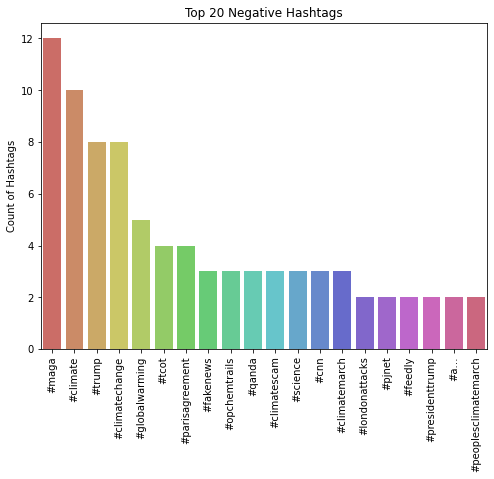

In [79]:
tag = nltk.FreqDist(hashtag_neg)
hashtag = pd.DataFrame({'Negative': list(tag.keys()),
                        'Count': list(tag.values())})
    
hashtag = hashtag.nlargest(columns='Count', n=20) 
plt.figure(figsize=(8,6))
ax = sns.barplot(data=hashtag, x='Negative', y='Count', palette="hls")
ax.set(ylabel = 'Count of Hashtags')
plt.title("Top 20 Negative Hashtags")
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

**Observation**

* It is interesting to see that Maga and Trump are the most occurring hashtags used in the anti-climate change tweets. It is of note that MAGA (Make America Great Again) was Trump's slogan during the 2016 election campaign in America, which shows support for Trump. So, most of the anti-climate tweets were from Trump supporters.
* TCOT (Top Conservative On Twitter) also rank high among anti-climate hashtags. It is well known that Republicans are the Conservatives, so we can infer that most of the anti-climate tweets shows support for Trump and the party. 
* Most of the anti-climate change hashtag tweets are majorly political

### **4.5.2 Plotting Top 20 Hashtags for Positive Sentiments**

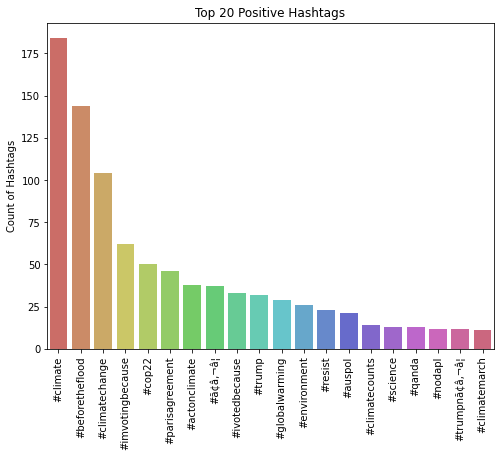

In [85]:
# Extract hashtags based on each sentiment type

tag = nltk.FreqDist(hashtag_pos)
hashtag = pd.DataFrame({'Positive': list(tag.keys()),
                        'Count': list(tag.values())})
    
hashtag = hashtag.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(8,6))
ax = sns.barplot(data=hashtag, x= "Positive", y = "Count",palette="hls")
ax.set(ylabel = 'Count of Hashtags')
plt.title("Top 20 Positive Hashtags")
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()


***Observation***

* 'BeforeTheFlood' ranked the most popular hashtags among the pro-climate change tweets. This we can trace to the documentary where discussions on the dangers of climate change and any possible solutions.

* ImVotingBecause and IVotedBecause hashtags in pro climate change tweets. These are likely political tweets.

* The 5th and 6th hashtags are COP22 and ParisAgreement.

### **4.5.3 Plotting Top 20 Hashtags for Neutral Sentiments**

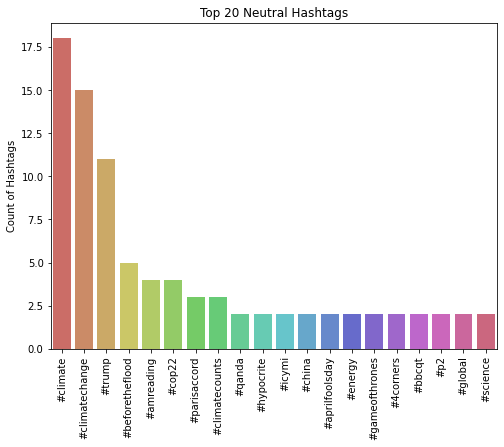

In [91]:
tag = nltk.FreqDist(hashtag_neutral)
hashtag = pd.DataFrame({'Neutral': list(tag.keys()),
                        'Count': list(tag.values())})

hashtag = hashtag.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(8,6))
ax = sns.barplot(data=hashtag, x= "Neutral", y = "Count",palette="hls")
ax.set(ylabel = 'Count of Hashtags')
ax.set(xlabel = '')
plt.title("Top 20 Neutral Hashtags")
plt.xticks(rotation=90)
plt.show()


### **4.5.4 Plotting Top 20 Hashtags for News Sentiments**

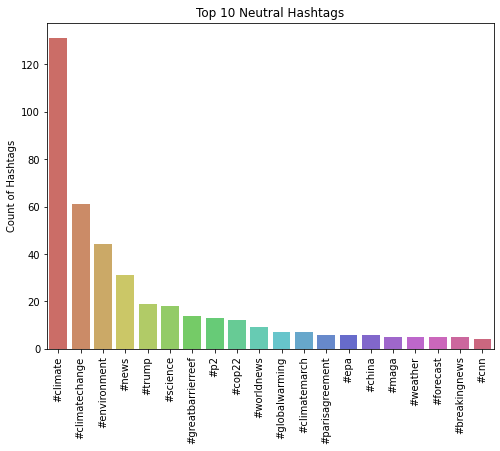

In [92]:
# Graph for News Sentiment
tag = nltk.FreqDist(hashtag_news)
hashtag = pd.DataFrame({'News': list(tag.keys()),
                        'Count': list(tag.values())})
    
hashtag = hashtag.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(8,6))
ax = sns.barplot(data=hashtag, x= "News", y = "Count",palette="hls")
ax.set(ylabel = 'Count of Hashtags')
ax.set(xlabel = '')
plt.title("Top 10 Neutral Hashtags")
plt.xticks(rotation=90)
plt.show()

## 4.6 Retweets by Sentiment

Retweet is the re-posting of a tweet which helps in quickly sharing a tweet with all followers.


In [181]:
def extract_retweet(tweet):

    """
    This function search for retweets 
    within each tweet in a dataframe
    
  
    """
    match = re.findall(r'^\s?RT\s@[a-zA-Z0-9_]{1}[a-zA-Z0-9_]{0,14}[\s:]', tweet)
    return match

In [172]:
# Extracting the retweets
train_eda['retweets'] = train_eda['message'].apply(extract_retweet)

In [190]:
train_eda.head()
retweets_list = list((train[train.message.str.contains('RT')])
                     .sentiment.value_counts())

,sentiment,message,tweetid,hashtag,retweet,retweets
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,[],None,[]
1,1,It's not like we lack evidence of anthropogeni...,126103,[],None,[]
2,2,RT @RawStory: Researchers say we have three ye...,698562,[],"<re.Match object; span=(0, 13), match='RT @Raw...",[RT @RawStory:]
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#],None,[]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight],"<re.Match object; span=(0, 20), match='RT @Soy...",[RT @SoyNovioDeTodas:]


In [176]:
train_eda.retweets.fillna(value=np.nan, inplace=True)

In [191]:
retweets_list = list((train_eda[train_eda.retweets.str.startswith('RT')])
                     .sentiment.value_counts())

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=15819)] are in the [columns]"

In [182]:
retweets_list

[5751, 2128, 1079, 682]

In [188]:
def is_retweet(tweet):
    """Helper Function to determine if a tweet is a re-tweet"""
    match = re.search(r'^\s?RT\s@[a-zA-Z0-9_]{1}[a-zA-Z0-9_]{0,14}[\s:]', tweet)
    if match:
        return match
    else:
        return None

In [189]:
train_eda['retweet'] = train_eda['message'].apply(is_retweet)


# Feature Engineering

## Splitting out the X variable from the target

We are splitting the **'sentiment'** column, which represents the dependent variable (y) and the newly created feature, **'cleaned_message'**, which represents the independent variable.

In [29]:
y = train['sentiment'].values
X = train['cleaned_message'].values

### Conversion of Tweets Texts to Numerical

We applied vectorisation to the tweet dataset. This is a process of converting texts into numerical features.

The method, TfidfVectorizer, was used for this process as it provides a means of prioritising less frequent tokens and penalising those that appear in almost all of the tweets.

In [77]:
#vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, stop_words="english")
vectorizer = TfidfVectorizer(sublinear_tf=True,
                             smooth_idf = True, 
                             max_df = 0.9,
                             min_df = 1,
                             strip_accents = 'ascii', 
                             ngram_range = (1, 2))
X_vectorized = vectorizer.fit_transform(X)

In [78]:
print('Shape of the vectorised training data: {}'.format(X_vectorized.shape))

Shape of the vectorised training data: (15819, 86662)


In [79]:
testx = test['message']
test_vect = vectorizer.transform(testx.values)
test_vect.data

array([0.0762284 , 0.4155136 , 0.29336529, ..., 0.04817831, 0.30348848,
       0.31146881])

# Class Imbalance

Balancing is required to address the issue of data imbalance noticed in our dataset. This is necessary so that all classes are weighted evenly so as to improve the model performance.

We would be applying the Synthetic Minority Oversampling Technique (SMOTE) to correct this imbalance. This technique entails creating 'synthetic' samples from the minority class.

In [54]:
# initializing a variable to the desired SMOTE
smote = SMOTE(sampling_strategy='minority')

# fit SMOTE to training dataset
X_smote, y_smote = smote.fit_sample(X_vectorized, y)

In [55]:
X_smote.shape

(23053, 86657)

In [258]:
y_smote.shape

(23053,)

### Splitting the training data into a training and validation set

In [80]:
X_train,X_val,y_train,y_val = train_test_split(X_vectorized, y, #X_smote,y_smote,
                                               test_size=.1,
                                               random_state=42
                                              )

## Model Building

In [81]:
# Checking the F1 score of different classifiers by carrying out cross-validation
random_state = 42
kf = KFold(n_splits=10, 
           random_state=random_state, 
           shuffle=True) # Define number of KFolds

clf = [LogisticRegression(max_iter = 4000), 
       LinearSVC(random_state=random_state),  
       ComplementNB()]

scores = []
for i in range(len(clf)):
    scores.append(cross_val_score(clf[i], X_train, y_train, 
                                  scoring=make_scorer(f1_score, average='macro'), 
                                  cv=kf).mean()
                 )

output_df = pd.DataFrame({'List of Algorithm': ['LR', 'LSVC', 'CNB'],
                          'F1_Macro_Scores': scores})
output = output_df.sort_values('F1_Macro_Scores', ascending=False)

print(output)

  List of Algorithm  F1_Macro_Scores
1              LSVC         0.628003
2               CNB         0.602705
0                LR         0.546875


In [82]:
# Compare results of best performing versus worst performing model
## Best performing model: LinearSVC()
clf = LinearSVC(random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print('Getting the Best Model Performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')))
print('\n' + classification_report(y_val, y_pred))

Getting the Best Model Performance

Accuracy: 0.7452591656131479
Precision: 0.7343311513596904
Recall: 0.5957590272465766
F1: 0.6349526511448219

              precision    recall  f1-score   support

          -1       0.74      0.40      0.52       126
           0       0.69      0.33      0.44       224
           1       0.75      0.89      0.81       895
           2       0.76      0.76      0.76       337

    accuracy                           0.75      1582
   macro avg       0.73      0.60      0.63      1582
weighted avg       0.74      0.75      0.73      1582



In [45]:
# Compare results of best performing versus worst performing model
## Worst performing model: LinearSVC()
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print('Worst model performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')))
print('\n' + classification_report(y_val, y_pred))

Worst model performance

Accuracy: 0.3944374209860936
Precision: 0.6245114404009589
Recall: 0.4765663931457348
F1: 0.4219414979769225

              precision    recall  f1-score   support

          -1       0.65      0.27      0.38       126
           0       0.19      0.88      0.31       224
           1       0.89      0.25      0.39       895
           2       0.77      0.50      0.61       337

    accuracy                           0.39      1582
   macro avg       0.62      0.48      0.42      1582
weighted avg       0.74      0.39      0.42      1582



In [83]:
# Specify the range of 'C' parameters for LinearSVC
params = {'C': [0.1, 0.5, 1, 5, 10]}

# Setting the GridSearch for the best parameters
clf = GridSearchCV(LinearSVC(max_iter=4000), 
                   param_grid=params, cv=kf, 
                   scoring=make_scorer(f1_score, average='macro'))

# Fit the gridsearch on the dataset
clf = clf.fit(X_train, y_train)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Best score: 0.6319617840473353
Best parameters: {'C': 5}


In [85]:
svc = LinearSVC(random_state=random_state, C=clf.best_params_['C'], multi_class='ovr')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)

svc_tuned = LinearSVC(random_state=random_state)
svc_tuned.fit(X_train, y_train)
y_pred_tuned = svc_tuned.predict(X_val)

print('LinearSVC model performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)) + 
      '  >>>  {}'.format(accuracy_score(y_val, y_pred_tuned)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')) + 
      '  >>>  {}'.format(precision_score(y_val, y_pred_tuned, average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')) + 
      '  >>>  {}'.format(recall_score(y_val, y_pred_tuned, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')) + 
      '  >>>  {}'.format(f1_score(y_val, y_pred_tuned, average='macro')))
print('\n' + classification_report(y_val, y_pred))
print('\n' + classification_report(y_val, y_pred_tuned) + '\n')

LinearSVC model performance

Accuracy: 0.7446270543615676  >>>  0.7452591656131479
Precision: 0.7063772852737489  >>>  0.7343311513596904
Recall: 0.611591325642066  >>>  0.5957590272465766
F1: 0.6424077292202828  >>>  0.6349526511448219

              precision    recall  f1-score   support

          -1       0.69      0.44      0.53       126
           0       0.63      0.37      0.47       224
           1       0.77      0.87      0.82       895
           2       0.74      0.77      0.75       337

    accuracy                           0.74      1582
   macro avg       0.71      0.61      0.64      1582
weighted avg       0.73      0.74      0.73      1582


              precision    recall  f1-score   support

          -1       0.74      0.40      0.52       126
           0       0.69      0.33      0.44       224
           1       0.75      0.89      0.81       895
           2       0.76      0.76      0.76       337

    accuracy                           0.75      1582


In [48]:
#Specify the range of alpha parameters for ComplementNB
params = {'alpha': [0.1, 0.5, 1], 
          'norm': [True, False]}

clf2 = GridSearchCV(ComplementNB(), 
                   param_grid=params, 
                   cv=kf, scoring=make_scorer(f1_score, average='macro')).fit(X_train, y_train)

print('Best score: {}'.format(clf2.best_score_))
print('Best parameters: {}'.format(clf2.best_params_))

Best score: 0.6126727165411945
Best parameters: {'alpha': 1, 'norm': True}


In [49]:
cnb = ComplementNB(alpha=clf2.best_params_['alpha'], norm=clf2.best_params_['norm'])
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_val)

cnb_tuned = ComplementNB()
cnb_tuned.fit(X_train, y_train)
y_pred_tuned = cnb_tuned.predict(X_val)

print('ComplementNB model performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)) + 
      '  >>>  {}'.format(accuracy_score(y_val, y_pred_tuned)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')) + 
      '  >>>  {}'.format(precision_score(y_val, y_pred_tuned, average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')) + 
      '  >>>  {}'.format(recall_score(y_val, y_pred_tuned, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')) + 
      '  >>>  {}'.format(f1_score(y_val, y_pred_tuned, average='macro')))
print('\n' + classification_report(y_val, y_pred))
print('\n' + classification_report(y_val, y_pred_tuned) + '\n')

ComplementNB model performance

Accuracy: 0.7041719342604298  >>>  0.6814159292035398
Precision: 0.6077248177550114  >>>  0.5868545449261429
Recall: 0.6220397307589383  >>>  0.6236560148817911
F1: 0.6132612267904514  >>>  0.5992889117033775

              precision    recall  f1-score   support

          -1       0.45      0.50      0.48       126
           0       0.50      0.45      0.47       224
           1       0.81      0.77      0.79       895
           2       0.67      0.77      0.72       337

    accuracy                           0.70      1582
   macro avg       0.61      0.62      0.61      1582
weighted avg       0.71      0.70      0.70      1582


              precision    recall  f1-score   support

          -1       0.42      0.50      0.46       126
           0       0.49      0.46      0.48       224
           1       0.83      0.71      0.76       895
           2       0.61      0.82      0.70       337

    accuracy                           0.68      1

In [86]:
# Running a prediction on the test data
#classifier = LinearSVC(max_iter=4000)
#linearsvc = classifier.fit(X_vectorized, y)
y_pred = svc.predict(test_vect)

In [87]:
test['sentiment'] = y_pred

# Model Selection

In [67]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost']

In [68]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()
]

In [ ]:
results.sort_values('F1 Train', ascending=False)

In [77]:
test_vect.shape

(10546, 86657)

## Creating Pickle File

In [50]:
import pickle
model_save_path = "team7_complement_naive_bayes_model.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(cnb,file)

# Submission

In [88]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)

# Conclusion

# References

1. https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/ ...SHIVAM BANSAL

